In [121]:
import numpy as np
import pandas as pd
import folium # map rendering library
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [122]:
# The coordinates of Amsterdam center
latitude = 52.372952
longitude = 4.906080

In [123]:
df=pd.read_csv('/content/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220308023209,2022-03-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.81
1,20168,https://www.airbnb.com/rooms/20168,20220308023209,2022-03-31,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.30
2,27886,https://www.airbnb.com/rooms/27886,20220308023209,2022-03-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.84
3,28871,https://www.airbnb.com/rooms/28871,20220308023209,2022-03-08,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.70
4,29051,https://www.airbnb.com/rooms/29051,20220308023209,2022-03-08,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.91,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.98


In [124]:
df.shape

(5732, 74)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5732 non-null   int64  
 1   listing_url                                   5732 non-null   object 
 2   scrape_id                                     5732 non-null   int64  
 3   last_scraped                                  5732 non-null   object 
 4   name                                          5732 non-null   object 
 5   description                                   5716 non-null   object 
 6   neighborhood_overview                         4054 non-null   object 
 7   picture_url                                   5732 non-null   object 
 8   host_id                                       5732 non-null   int64  
 9   host_url                                      5732 non-null   o

In [126]:
#check null values
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               576
Length: 74, dtype: int64

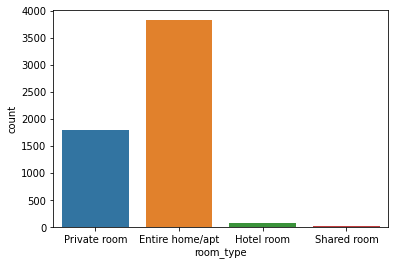

In [127]:
ax = sns.countplot(x="room_type", data=df)

In [128]:
df['price'] = df['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)

In [129]:
'''check price for each room type'''
rt_price = df.groupby("room_type")["price"].mean()
rt_price

room_type
Entire home/apt    197.890021
Hotel room         121.431818
Private room       128.868862
Shared room         72.708333
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


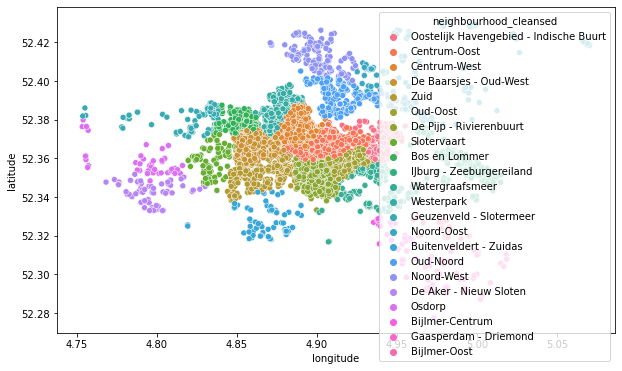

In [130]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_cleansed,legend='auto')
plt.ioff()

<function matplotlib.pyplot.show>

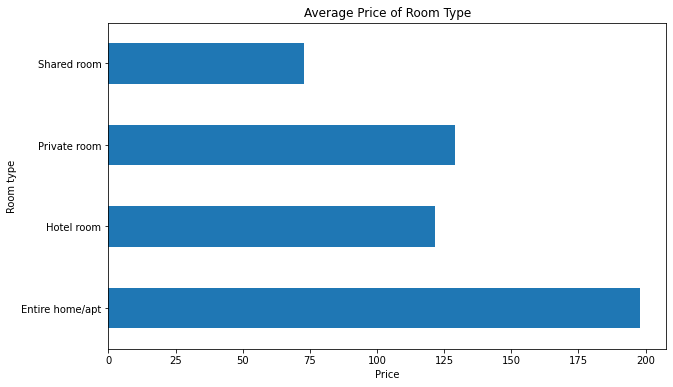

In [131]:
'''plot the average price for each room type'''
plt.figure(figsize = (10,6))
df.groupby('room_type')['price'].mean().plot(kind='barh')
plt.xlabel('Price')
plt.ylabel('Room type')
plt.title("Average Price of Room Type")
plt.show

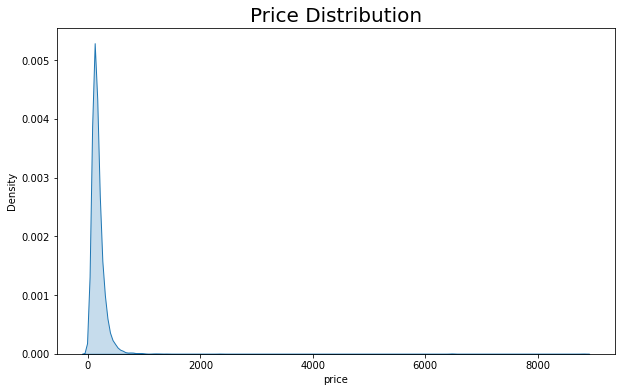

In [132]:
'''check price distribution'''
plt.figure(figsize = (10,6))
plt.title('Price Distribution',fontsize=20)
sns.kdeplot(df['price'], shade='True', legend='True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


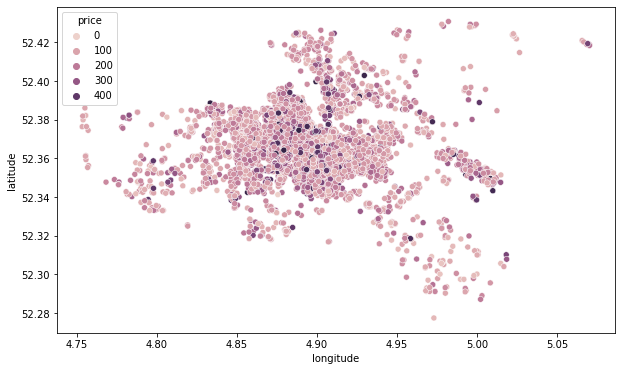

In [133]:
'''plot the price map of listing price < 500, we can see the distribution of prices more clearly'''
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df["price"][df["price"]<500])
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


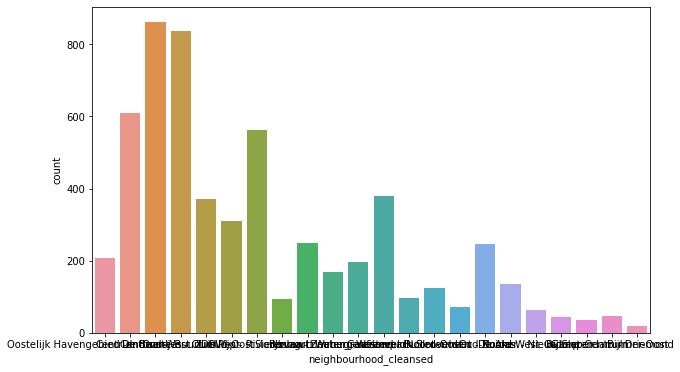

In [134]:
'''check neighbourhood_group variable'''
plt.figure(figsize = (10,6))
ax = sns.countplot(df.neighbourhood_cleansed)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


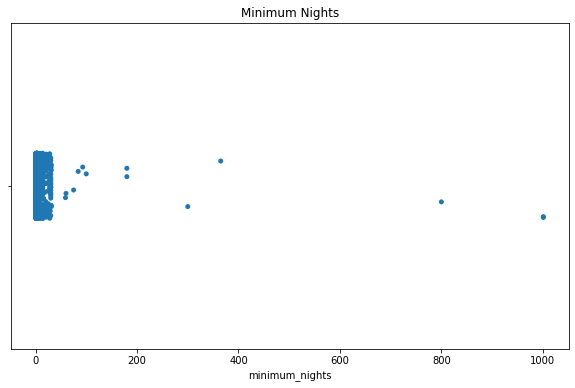

In [135]:
'''check minimum_nights variable'''
plt.figure(figsize = (10,6))
plt.title('Minimum Nights')
sns.stripplot(df['minimum_nights'])

In [136]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220308023209,2022-03-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.81
1,20168,https://www.airbnb.com/rooms/20168,20220308023209,2022-03-31,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.30
2,27886,https://www.airbnb.com/rooms/27886,20220308023209,2022-03-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.84
3,28871,https://www.airbnb.com/rooms/28871,20220308023209,2022-03-08,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.70
4,29051,https://www.airbnb.com/rooms/29051,20220308023209,2022-03-08,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.91,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.98


In [137]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [138]:
not_interesting_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'property_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'beds', 'amenities', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review','review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location', 'license', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']

df1 = df.drop(not_interesting_cols, axis=1)

In [139]:
df2 = df1.drop(['neighbourhood_group_cleansed'], axis=1)

In [140]:
df2

,host_id,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,bedrooms,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,calculated_host_listings_count,reviews_per_month
0,3159,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,1.0,49.0,3,28,62,285,4.89,4.93,4.82,1,1.81
1,59484,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.364070,4.893930,Private room,1.0,106.0,1,365,0,339,4.44,4.69,4.49,2,2.30
2,97647,"Amsterdam, North Holland, Netherlands",Centrum-West,52.387610,4.891880,Private room,1.0,134.0,2,356,189,228,4.95,4.93,4.79,1,1.84
3,124245,"Amsterdam, North Holland, Netherlands",Centrum-West,52.367750,4.890920,Private room,1.0,75.0,2,1825,146,379,4.88,4.94,4.82,2,2.70
4,124245,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.365840,4.891110,Private room,1.0,55.0,2,730,170,532,4.78,4.87,4.75,2,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,41049115,NaN,Oud-Oost,52.356550,4.919800,Entire home/apt,1.0,108.0,3,5,5,0,NaN,NaN,NaN,1,NaN
5728,1029291,NaN,Slotervaart,52.365220,4.837980,Entire home/apt,2.0,140.0,5,365,38,0,NaN,NaN,NaN,1,NaN
5729,100996455,NaN,Oud-Oost,52.349269,4.913563,Entire home/apt,1.0,91.0,2,365,16,0,NaN,NaN,NaN,1,NaN
5730,447869666,NaN,Centrum-West,52.376490,4.893809,Entire home/apt,2.0,450.0,1,365,351,0,NaN,NaN,NaN,1,NaN


In [141]:
df2.isnull().sum()

host_id                              0
neighbourhood                     1678
neighbourhood_cleansed               0
latitude                             0
longitude                            0
room_type                            0
bedrooms                           327
price                                0
minimum_nights                       0
maximum_nights                       0
availability_365                     0
number_of_reviews                    0
review_scores_rating               576
review_scores_accuracy             585
review_scores_value                585
calculated_host_listings_count       0
reviews_per_month                  576
dtype: int64

In [142]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         5732 non-null   int64  
 1   neighbourhood                   4054 non-null   object 
 2   neighbourhood_cleansed          5732 non-null   object 
 3   latitude                        5732 non-null   float64
 4   longitude                       5732 non-null   float64
 5   room_type                       5732 non-null   object 
 6   bedrooms                        5405 non-null   float64
 7   price                           5732 non-null   float64
 8   minimum_nights                  5732 non-null   int64  
 9   maximum_nights                  5732 non-null   int64  
 10  availability_365                5732 non-null   int64  
 11  number_of_reviews               5732 non-null   int64  
 12  review_scores_rating            51

In [163]:
#Replace blanks with NaNs
data = df2.replace('_', np.nan)

In [164]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [165]:
numeric_features = data.select_dtypes(exclude=["category","object"]).columns.tolist()

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data[numeric_features]  = imp.fit_transform(data[numeric_features])

categorical_features = data.select_dtypes(include=["object"]).columns.tolist()
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[categorical_features]  = imp1.fit_transform(data[categorical_features])


In [166]:
data

,host_id,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,bedrooms,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,calculated_host_listings_count,reviews_per_month
0,3159.0,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,1.0,49.0,3.0,28.0,62.0,285.0,4.890000,4.930000,4.820000,1.0,1.810000
1,59484.0,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.364070,4.893930,Private room,1.0,106.0,1.0,365.0,0.0,339.0,4.440000,4.690000,4.490000,2.0,2.300000
2,97647.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.387610,4.891880,Private room,1.0,134.0,2.0,356.0,189.0,228.0,4.950000,4.930000,4.790000,1.0,1.840000
3,124245.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.367750,4.890920,Private room,1.0,75.0,2.0,1825.0,146.0,379.0,4.880000,4.940000,4.820000,2.0,2.700000
4,124245.0,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.365840,4.891110,Private room,1.0,55.0,2.0,730.0,170.0,532.0,4.780000,4.870000,4.750000,2.0,3.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,41049115.0,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,52.356550,4.919800,Entire home/apt,1.0,108.0,3.0,5.0,5.0,0.0,4.793545,4.832073,4.643021,1.0,1.107719
5728,1029291.0,"Amsterdam, Noord-Holland, Netherlands",Slotervaart,52.365220,4.837980,Entire home/apt,2.0,140.0,5.0,365.0,38.0,0.0,4.793545,4.832073,4.643021,1.0,1.107719
5729,100996455.0,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,52.349269,4.913563,Entire home/apt,1.0,91.0,2.0,365.0,16.0,0.0,4.793545,4.832073,4.643021,1.0,1.107719
5730,447869666.0,"Amsterdam, Noord-Holland, Netherlands",Centrum-West,52.376490,4.893809,Entire home/apt,2.0,450.0,1.0,365.0,351.0,0.0,4.793545,4.832073,4.643021,1.0,1.107719


In [167]:
data.iloc[:,3:].describe()

,latitude,longitude,bedrooms,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,calculated_host_listings_count,reviews_per_month
count,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000
mean,52.366941,4.891896,1.571138,174.613922,3.893057,527.887125,98.579728,49.570830,4.793545,4.832073,4.643021,2.205862,1.107719
std,0.017964,0.038285,0.893754,200.142824,22.916330,522.817151,121.258191,90.739099,0.316738,0.244331,0.288743,3.127854,1.978015
min,52.277520,4.753340,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.010000
25%,52.356277,4.868655,1.000000,100.000000,2.000000,28.000000,0.000000,4.000000,4.750000,4.800000,4.560000,1.000000,0.270000
50%,52.366470,4.888655,1.000000,145.000000,2.000000,365.000000,34.000000,17.000000,4.850000,4.880000,4.670000,1.000000,0.590000
75%,52.376740,4.909320,2.000000,200.000000,3.000000,1125.000000,187.000000,48.000000,4.970000,4.990000,4.800000,2.000000,1.107719
max,52.430760,5.070100,15.000000,8812.000000,1001.000000,1825.000000,365.000000,939.000000,5.000000,5.000000,5.000000,20.000000,78.940000


In [168]:
'''To make a better statisticial analysis and to get better scores, 
we will have applied log transformation for the price column.'''
data['log_price'] = np.log(data.price+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

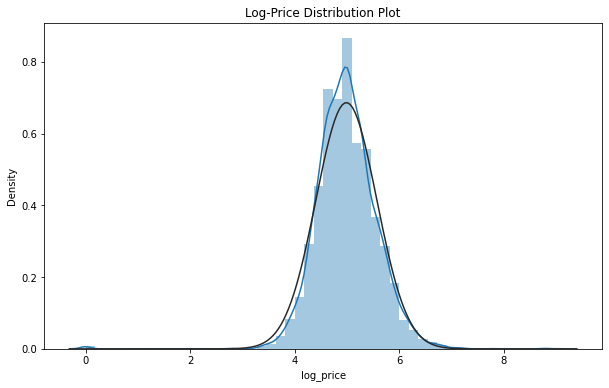

In [169]:
plt.figure(figsize=(10,6))
sns.distplot(data['log_price'], fit=norm)
plt.title("Log-Price Distribution Plot")

[(11.0, 0.0)]

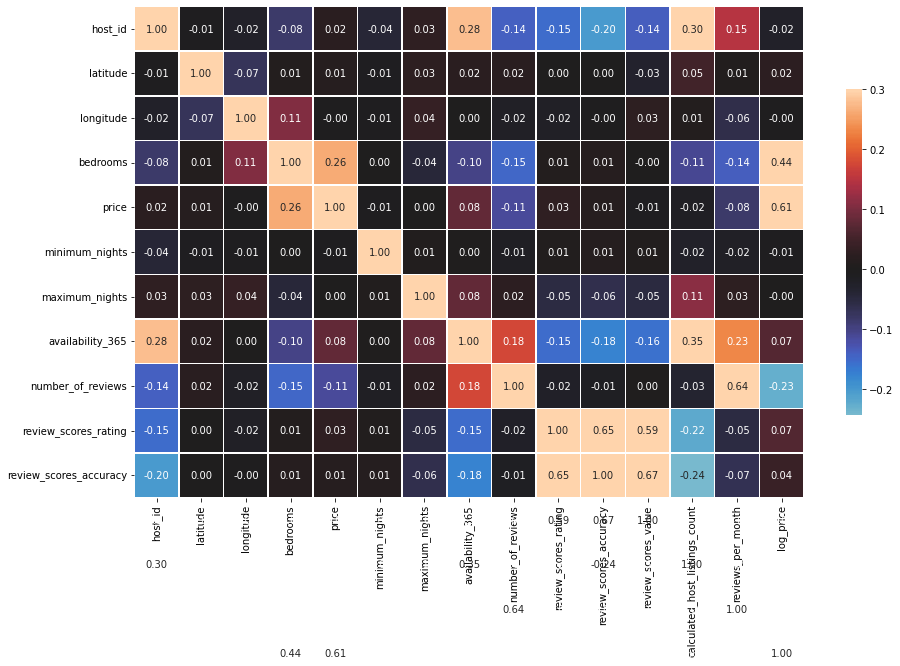

In [170]:
'''Correlation Matrix'''
plt.figure(figsize=(15,12))
corr=data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))

In [171]:
data = data[data['availability_365'] != 0]
data.shape

(3937, 18)

In [172]:
data = data[data['price'] != 0]
data = data[data['number_of_reviews'] != 0]
data = data[data['review_scores_rating'].notnull()]
data.shape

(3507, 18)

In [173]:
def examine_missing_values(data):
    data_na= data.isnull().sum().sort_values(ascending=False)
    data_na_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing_data = pd.concat([data_na, data_na_percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [174]:
missing_data = examine_missing_values(data)
missing_data.head(20)

,Total,Percent
host_id,0,0.0
neighbourhood,0,0.0
reviews_per_month,0,0.0
calculated_host_listings_count,0,0.0
review_scores_value,0,0.0
review_scores_accuracy,0,0.0
review_scores_rating,0,0.0
number_of_reviews,0,0.0
availability_365,0,0.0
maximum_nights,0,0.0


In [175]:
data['price']

0        49.0
2       134.0
3        75.0
4        55.0
6       140.0
        ...  
5694    149.0
5695    149.0
5697     38.0
5702    120.0
5703    125.0
Name: price, Length: 3507, dtype: float64

In [176]:
data = data.drop('neighbourhood', axis=1)

In [177]:
data.columns = ['neighbourhood' if x=='neighbourhood_cleansed' else x for x in data.columns]
features = data
print(features.shape)
features.head()

(3507, 17)


,host_id,neighbourhood,latitude,longitude,room_type,bedrooms,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,calculated_host_listings_count,reviews_per_month,log_price
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,1.0,49.0,3.0,28.0,62.0,285.0,4.89,4.93,4.82,1.0,1.81,3.912023
2,97647.0,Centrum-West,52.38761,4.89188,Private room,1.0,134.0,2.0,356.0,189.0,228.0,4.95,4.93,4.79,1.0,1.84,4.905275
3,124245.0,Centrum-West,52.36775,4.89092,Private room,1.0,75.0,2.0,1825.0,146.0,379.0,4.88,4.94,4.82,2.0,2.70,4.330733
4,124245.0,Centrum-Oost,52.36584,4.89111,Private room,1.0,55.0,2.0,730.0,170.0,532.0,4.78,4.87,4.75,2.0,3.98,4.025352
6,211696.0,De Baarsjes - Oud-West,52.36786,4.87458,Entire home/apt,2.0,140.0,2.0,60.0,206.0,185.0,4.77,4.77,4.62,1.0,1.32,4.948760


Correct highly skewed numerical features
The skewed distribution has the following disadvantages:

Highly skewed distributions are difficult to examine because most of the observations are confined to a small part of the range of the data.
Outlying values in the direction of the skew are brought in toward the main body of the data when the distribution is made more symmetric.
For the features with high skewness, I uesed box-cox transformation to correct the non-normal distribution while maintaining the information.

In [178]:
# from scipy.stats import skew, boxcox_normmax
# from scipy.special import boxcox1p
# skew_features = features[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
# high_skew = skew_features[skew_features > 0.5]
# skew_index = high_skew.index

# for i in skew_index:
#     features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

In [179]:
features['price']

0        49.0
2       134.0
3        75.0
4        55.0
6       140.0
        ...  
5694    149.0
5695    149.0
5697     38.0
5702    120.0
5703    125.0
Name: price, Length: 3507, dtype: float64

In [180]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

Checking the statistical distribution of prices
count    3507.000000
mean      175.264899
std       184.882293
min        26.000000
25%       100.000000
50%       145.000000
75%       202.000000
max      8812.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 175.26 and sigma = 184.86



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


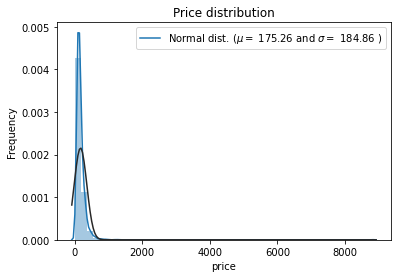

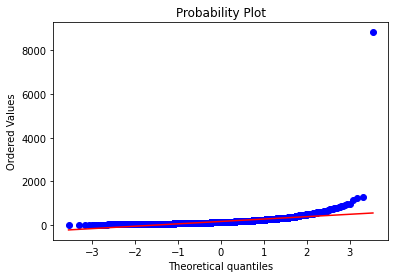

In [181]:
check_dist(features['price'])

In [182]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [183]:
import geopandas as gpd
geo_ams = gpd.read_file('/content/neighbourhoods.geojson')

In [184]:
geo_ams["longitude"] = geo_ams.centroid.x
geo_ams["latitude"] = geo_ams.centroid.y
geo_ams.drop('neighbourhood_group', axis=1, inplace=True)
geo_ams

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,neighbourhood,geometry,longitude,latitude
0,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",4.977317,52.320279
1,Noord-Oost,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5...",5.003523,52.398339
2,Noord-West,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4...",4.894589,52.415306
3,Oud-Noord,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4...",4.910489,52.394068
4,IJburg - Zeeburgereiland,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5...",4.998377,52.360899
5,Centrum-West,"MULTIPOLYGON Z (((4.90640 52.38004 42.97078, 4...",4.889084,52.376426
6,Oostelijk Havengebied - Indische Buurt,"MULTIPOLYGON Z (((4.96131 52.35913 43.00823, 4...",4.941492,52.371412
7,Centrum-Oost,"MULTIPOLYGON Z (((4.93297 52.37041 42.98810, 4...",4.908287,52.367753
8,Oud-Oost,"MULTIPOLYGON Z (((4.93743 52.35774 43.01043, 4...",4.919954,52.357795
9,Watergraafsmeer,"MULTIPOLYGON Z (((4.96971 52.35636 43.01317, 4...",4.931061,52.342719


In [185]:
neighbourhood_price = features.groupby('neighbourhood').median()['price']
neighbourhood_price = pd.DataFrame({'neighbourhood':neighbourhood_price.index, 'price': neighbourhood_price.T.values})
neighbourhood_price.sort_values('price', ascending=False, inplace=True)
neighbourhood_price.head()

,neighbourhood,price
4,Centrum-Oost,160.0
8,De Pijp - Rivierenbuurt,160.0
21,Zuid,153.0
20,Westerpark,150.0
11,IJburg - Zeeburgereiland,150.0


In [188]:
map_ams_price = folium.Map(location=[latitude, longitude], zoom_start=12)
map_ams_price.choropleth(
    geo_data=r'/content/neighbourhoods.geojson',
    data=neighbourhood_price,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The average_price',
    reset=True
)
map_ams_price
# map_ams_price.save('map_ams_price.html')

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [189]:
features.to_csv('listings_cleaned.csv')